<a href="https://colab.research.google.com/github/Bowist27/4DeElixir/blob/main/Peter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mesa seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.7/425.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 14

In [ ]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model

In [ ]:
# Debido a que necesitamos que existe un solo agente por celda, elegimos ''SingleGrid''.
from mesa.space import SingleGrid

In [ ]:
# Con ''SimultaneousActivation, hacemos que todos los agentes se activen ''al mismo tiempo''.
from mesa.time import SimultaneousActivation

In [ ]:
# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

In [ ]:
# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [ ]:
# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

In [ ]:
# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

In [ ]:
class GameOfLifeAgent(Agent):
  def __init__(self, id, model):
    super().__init__(id,model)
    #Una es el estado
    self.live = self.random.choice([0, 1])
    #Necesitamos una variable adicional, es el siguiente estado que tendra
    self.next_state = None
    #Hay que implementar un metodo llamado step, que es lo que va a hacer,
    #en una simultanea se deja el resultado de tomar la decision, lo que
    #hacemnos es cualquier resultado dejarlo en next

    #Obtener a los vecinos, herramienta que nos da a los vecinos, (get_neighborhood), devuelve la lista de celdas con los vecinos

    #get_neighbors, lista de agentes que son vecinos a mi, si no hay agente no lo devuelve.

    #Pedirle a un grid que nos de los vecinos de la posicion
  def step(self):
    neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)

    #Contar cuantos vecinos estan vivos, vivos son 1, muertos son 0, si contamos todos lo obtenemos numero de vivos

    count = 0
    for agent in neighbors:
      count += agent.live

    #Si mi agente esta vivo,
    self.next = self.live
    if self.live == 1:
      if count < 2 or count > 3:
        self.next = 0
    else:
      if count == 3:
        self.next = 1

  #Variables se actualizan en advance
  def advance(self):
    self.live = self.next

In [ ]:
def get_grid(model):
  grid = np.zeros( (model.grid.width, model.grid.height) )
  for agent, (x,y) in model.grid.coord_iter():
    if agent.live == 1:
      grid[x][y] = 1
  return grid

In [ ]:
class GameOfLifeModel(Model):
  def __init__(self, width, height):
    # Cosa que no hace nada pero tiene que hacerse
    super().__init__()
    #Las matrices que manejan mesa, estan en base al primer plano cartesiano
    #Se maneja como si fuera X y Y

    #Tenemos un espacio infinito, un espacio infinito dentro de una matriz bidimensional
    self.grid = SingleGrid(width, height, torus=True)
    #Esquema de activacion simultaneo
    self.schedule = SimultaneousActivation(self)
    #Recoleccion de Datos a nivel de modelo y
    self.datacollector = DataCollector(
        #En el diccionario poner l allave que tiene esos datos y asociados los datos que quiero recuperar
        model_reporters={"Grid":get_grid}
    )

    for _, (x, y) in self.grid.coord_iter():
      #Como no se van a mover usamos su ubicacion como identificacion
      agent = GameOfLifeAgent((x, y), self)
      #Colocar al agente en esta ubicacion
      self.grid.place_agent(agent, (x, y))
      #Agregado a la lista de identificacion
      self.schedule.add(agent)

  #Definir un metodo step para el modelo
  def step(self):
    #Manda a llamar las funciones lals ejecuta y las guarda dentro del diccionario con todo lo que yo le diga
    self.datacollector.collect(self)
    #Itera sobre la lista de agentes registrados y les aplica el metodo step, solo los registrados
    self.schedule.step()


In [ ]:
GENERATIONS = 2000
N = 20

model = GameOfLifeModel(N, N)
for i in range(GENERATIONS):
  model.step()

In [ ]:
all_grids = model.datacollector.get_model_vars_dataframe()
all_grids.head(5)

Grid
0  [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,...
1  [[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0,...
2  [[0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...
3  [[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4  [[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

Error in callback <function _draw_all_if_interactive at 0x7d92c3f6e830> (for post_execute):


TypeError: animate() takes 0 positional arguments but 1 was given

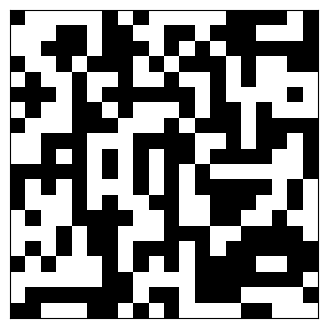

In [ ]:
fig, axis = plt.subplots(figsize=(4,4))
axis.set_xticks([])
axis.set_yticks([])
patch = plt.imshow(all_grids.iloc[0,0], cmap=plt.cm.binary)

def animate():
  patch.set_data(all_grids.iloc[i,0])

anim = animation.FuncAnimation(fig, animate, frames=GENERATIONS)

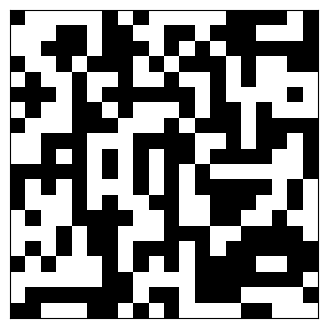

In [ ]:
fig, axis = plt.subplots(figsize=(4,4))
axis.set_xticks([])
axis.set_yticks([])
patch = plt.imshow(all_grids.iloc[0,0], cmap=plt.cm.binary)

def animate(i):  # agregar el argumento i
    patch.set_data(all_grids.iloc[i,0])

anim = animation.FuncAnimation(fig, animate, frames=GENERATIONS)


In [ ]:
anim